In [1]:
# Thamys Abrahao - 06/2018
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
%matplotlib inline
sns.set(rc={'figure.figsize':(7.7,7.7)}) # graph size

# Montagem da base para análise do lifetime value (LTV)

**A Base para análise do LTV terá quatro colunas:** 
    
* StudentId: identificação do assinante
     
     
* Frequencia: total de arquivos visualizados (fileViews)
 
     frequencia =  total de visualizações - 1
     
     
* Tempo_assinatura: duração da assinatura, ou seja, tempo (em dias) entre a primeira visualização e o último dia da base de dados


* Recência: tempo em dias do usuário na base no momento em que ele visualizou o último arquivo no Passei Direto

In [2]:
# Tipo de login
with open('premium_payments.json', 'r') as f:
    data = json.load(f)
    
df_premium = pd.DataFrame(data)

In [3]:
df_premium.head()

,PaymentDate,PlanType,StudentId
0,2017-05-26 22:25:03.000000,Anual,12970655
1,2018-05-26 10:05:28.000000,Anual,12970655
2,2016-07-21 19:57:57.717000,Mensal,12970655
3,2016-08-21 08:47:42.947000,Mensal,12970655
4,2016-09-21 08:54:06.270000,Mensal,12970655


In [4]:
# quantificando o total de arquivos visualizados
with open('fileViews.json', 'r') as f:
    data = json.load(f)
    
df_fileViews = pd.DataFrame(data)
df_fileViews.shape

(3028983, 4)

In [5]:
df_fileViews.head()

,FileName,StudentId,Studentclient,ViewDate
0,Exercicios Resolvidos do Halliday sobre Rotaçã...,12970655,Website,2017-02-23 10:46:03.047000
1,Exercicios Resolvidos do Halliday sobre Rotaçã...,12970655,Website,2017-02-23 10:46:12.370000
2,CALCULO I,12970655,Website,2017-05-25 22:39:48.000000
3,CALCULO I,12970655,Website,2017-05-25 22:40:36.000000
4,CALCULO I,12970655,Website,2017-05-25 22:43:16.000000


In [6]:
df = pd.merge(df_fileViews, df_premium, how='outer', indicator=True)

In [7]:
df['_merge'].value_counts()

left_only     2524087
both          2019744
right_only         10
Name: _merge, dtype: int64

In [8]:
# df apenas com os assinantes
df_f = df[df._merge == 'both']
df_f.shape

(2019744, 7)

In [9]:
df_f = df_f[['FileName', 'StudentId', 'ViewDate']]
df_f = df_f.drop_duplicates()
print(df_f.shape)
print(df_f.dtypes)
df_f.head()

(503331, 3)
FileName     object
StudentId     int64
ViewDate     object
dtype: object


,FileName,StudentId,ViewDate
0,Exercicios Resolvidos do Halliday sobre Rotaçã...,12970655,2017-02-23 10:46:03.047000
20,Exercicios Resolvidos do Halliday sobre Rotaçã...,12970655,2017-02-23 10:46:12.370000
40,CALCULO I,12970655,2017-05-25 22:39:48.000000
60,CALCULO I,12970655,2017-05-25 22:40:36.000000
80,CALCULO I,12970655,2017-05-25 22:43:16.000000


In [10]:
df_f.loc[:, 'date'] = pd.to_datetime(df_f['ViewDate'])

In [11]:
df_f.head()

,FileName,StudentId,ViewDate,date
0,Exercicios Resolvidos do Halliday sobre Rotaçã...,12970655,2017-02-23 10:46:03.047000,2017-02-23 10:46:03.047
20,Exercicios Resolvidos do Halliday sobre Rotaçã...,12970655,2017-02-23 10:46:12.370000,2017-02-23 10:46:12.370
40,CALCULO I,12970655,2017-05-25 22:39:48.000000,2017-05-25 22:39:48.000
60,CALCULO I,12970655,2017-05-25 22:40:36.000000,2017-05-25 22:40:36.000
80,CALCULO I,12970655,2017-05-25 22:43:16.000000,2017-05-25 22:43:16.000


In [12]:
df_f.loc[:, 'date'] = df_f['date'].dt.normalize()
df_f.drop('ViewDate', axis=1, inplace=True)

In [13]:
df_f.head()

,FileName,StudentId,date
0,Exercicios Resolvidos do Halliday sobre Rotaçã...,12970655,2017-02-23
20,Exercicios Resolvidos do Halliday sobre Rotaçã...,12970655,2017-02-23
40,CALCULO I,12970655,2017-05-25
60,CALCULO I,12970655,2017-05-25
80,CALCULO I,12970655,2017-05-25


In [14]:
# filtrando apenas as entradas a partir de nov/17
df_nov = df_f[df_f.date >= '2017-11-01']

In [15]:
print(df_nov.shape)
df_nov.head()

(273104, 3)


,FileName,StudentId,date
160,Aula 5 - planejamento,12970655,2017-12-04
180,AV2 Imunologia Básica (Estácio),12970655,2017-12-04
320,SELFCOACHING - TÉCNICA PARA CONCURSOS,12970655,2018-04-13
340,SELFCOACHING - TÉCNICA PARA CONCURSOS,12970655,2018-04-13
360,SELFCOACHING - TÉCNICA PARA CONCURSOS,12970655,2018-04-13


In [16]:
# data mais antiga e mais recente na df
print(df_nov.date.min())
print(df_nov.date.max())
data_mais_recente = df_nov.date.max()

2017-11-01 00:00:00
2018-06-08 00:00:00


In [17]:
# student_id e frequencia
df_freq = df_nov.groupby('StudentId')['FileName'].count().reset_index()
df_freq.columns = ['StudentId', 'frequencia']
df_freq['frequencia'] = df_freq['frequencia'] - 1 

In [18]:
df_freq.head(15)

,StudentId,frequencia
0,43621,461
1,51498,2
2,105540,74
3,258634,67
4,311572,141
5,344828,33
6,357822,40
7,370507,12
8,486826,19
9,582516,358


# tempo de assinatura do usuário na base de dados (considerando os dados a partir de nov/17)

In [19]:
df_tempo = df_nov.groupby('StudentId')['date'].min().reset_index()
df_tempo.columns = ['StudentId', 'primeira_visita']
df_tempo.head()

,StudentId,primeira_visita
0,43621,2017-11-17
1,51498,2017-11-22
2,105540,2017-11-14
3,258634,2017-11-12
4,311572,2017-11-23


In [20]:
print(data_mais_recente)

2018-06-08 00:00:00


In [21]:
df_tempo['tempo_assinatura'] = data_mais_recente - df_tempo['primeira_visita']
df_tempo.head()

,StudentId,primeira_visita,tempo_assinatura
0,43621,2017-11-17,203 days
1,51498,2017-11-22,198 days
2,105540,2017-11-14,206 days
3,258634,2017-11-12,208 days
4,311572,2017-11-23,197 days


In [22]:
df_tempo_assinatura = df_tempo[['StudentId', 'tempo_assinatura']]
df_tempo_assinatura.head()

,StudentId,tempo_assinatura
0,43621,203 days
1,51498,198 days
2,105540,206 days
3,258634,208 days
4,311572,197 days


# Recência do usuário
tempo de assinatura, em dias, do usuário na base na última vez que ele visualizou um arquivo

In [23]:
df_recencia = df_nov.groupby('StudentId')['date'].max().reset_index()
df_recencia.columns = ['StudentId', 'ultima_visita']
# recencia nula significa que o usuário só visualizou um arquivo 
# na primeira vez que ele entrou no site

In [24]:
df_recencia.head()

,StudentId,ultima_visita
0,43621,2018-06-07
1,51498,2018-06-07
2,105540,2018-05-08
3,258634,2018-04-04
4,311572,2018-06-06


In [25]:
df_recencia = pd.merge(df_recencia, df_tempo, how='outer', on='StudentId', indicator=True)

In [26]:
print(df_recencia['_merge'].value_counts())
df_recencia.head()

both          1957
right_only       0
left_only        0
Name: _merge, dtype: int64


,StudentId,ultima_visita,primeira_visita,tempo_assinatura,_merge
0,43621,2018-06-07,2017-11-17,203 days,both
1,51498,2018-06-07,2017-11-22,198 days,both
2,105540,2018-05-08,2017-11-14,206 days,both
3,258634,2018-04-04,2017-11-12,208 days,both
4,311572,2018-06-06,2017-11-23,197 days,both


In [27]:
df_recencia['recencia'] = df_recencia['ultima_visita'] - df_recencia['primeira_visita']
df_recencia.head()

,StudentId,ultima_visita,primeira_visita,tempo_assinatura,_merge,recencia
0,43621,2018-06-07,2017-11-17,203 days,both,202 days
1,51498,2018-06-07,2017-11-22,198 days,both,197 days
2,105540,2018-05-08,2017-11-14,206 days,both,175 days
3,258634,2018-04-04,2017-11-12,208 days,both,143 days
4,311572,2018-06-06,2017-11-23,197 days,both,195 days


In [28]:
df_recencia = df_recencia[['StudentId', 'recencia']]

# Base para LTV

In [29]:
df_ = pd.merge(df_freq, df_tempo_assinatura, how='outer', on='StudentId')

In [30]:
df_.shape

(1957, 3)

In [31]:
df_ltv = pd.merge(df_, df_recencia, how='outer', on='StudentId')

In [32]:
df_ltv.shape

(1957, 4)

In [33]:
df_ltv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1957 entries, 0 to 1956
Data columns (total 4 columns):
StudentId           1957 non-null int64
frequencia          1957 non-null int64
tempo_assinatura    1957 non-null timedelta64[ns]
recencia            1957 non-null timedelta64[ns]
dtypes: int64(2), timedelta64[ns](2)
memory usage: 76.4 KB


In [34]:
df_ltv.head()

,StudentId,frequencia,tempo_assinatura,recencia
0,43621,461,203 days,202 days
1,51498,2,198 days,197 days
2,105540,74,206 days,175 days
3,258634,67,208 days,143 days
4,311572,141,197 days,195 days


In [35]:
df_ltv.dtypes

StudentId                     int64
frequencia                    int64
tempo_assinatura    timedelta64[ns]
recencia            timedelta64[ns]
dtype: object

In [36]:
df_ltv.loc[:,'tempo_assinatura'] = df_ltv['tempo_assinatura'].dt.days
df_ltv.loc[:,'recencia'] = df_ltv['recencia'].dt.days

In [37]:
df_ltv.head()

,StudentId,frequencia,tempo_assinatura,recencia
0,43621,461,203,202
1,51498,2,198,197
2,105540,74,206,175
3,258634,67,208,143
4,311572,141,197,195


In [38]:
len(df_ltv['StudentId'].drop_duplicates().dropna())

1957

205.240674502
211.0


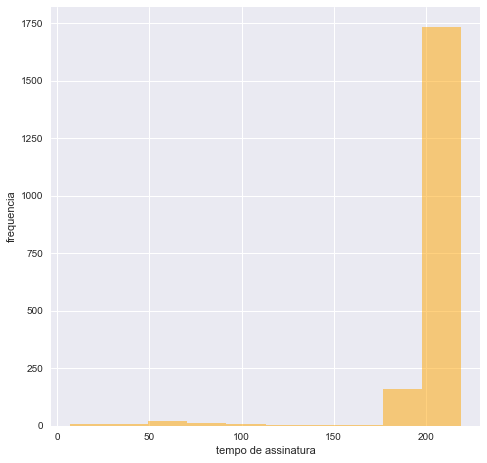

In [39]:
# histograma do tempo de assinatura

print(df_ltv['tempo_assinatura'].mean())
print(df_ltv['tempo_assinatura'].median())

plt.hist(df_ltv['tempo_assinatura'], color='orange', alpha=0.5)
plt.xlabel('tempo de assinatura')  
plt.ylabel('frequencia')
plt.title('', fontsize=20)

plt.legend()
plt.savefig('hist_tempo_assinatura.png', dpi=100)
plt.show();


138.552376086
84.0


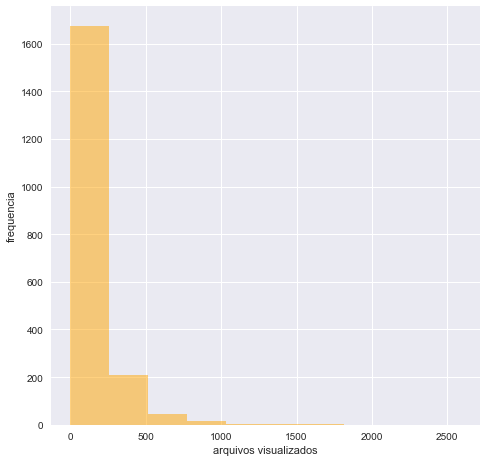

In [40]:
# histograma da frequencia

print(df_ltv['frequencia'].mean())
print(df_ltv['frequencia'].median())

plt.hist(df_ltv['frequencia'], color='orange', alpha=0.5)
plt.xlabel('arquivos visualizados')  
plt.ylabel('frequencia')
plt.title('', fontsize=20)

plt.legend()
plt.savefig('hist_frequencia.png', dpi=100)
plt.show();


160.381706694
195.0


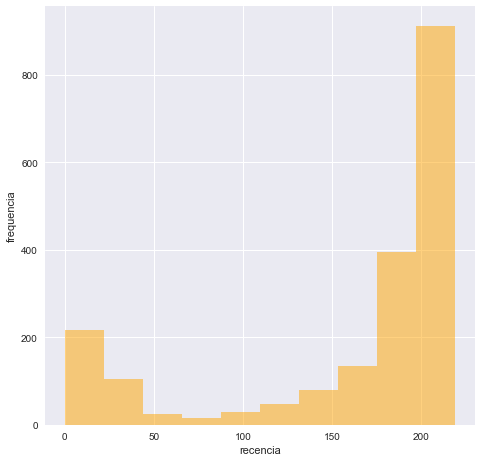

In [41]:
# histograma da recencia

print(df_ltv['recencia'].mean())
print(df_ltv['recencia'].median())

plt.hist(df_ltv['recencia'], color='orange', alpha=0.5)
plt.xlabel('recencia')  
plt.ylabel('frequencia')
plt.title('', fontsize=20)

plt.legend()
plt.savefig('hist_recencia.png', dpi=100)
plt.show();